# Exercise 8 | Anomaly Detection and Collaborative Filtering

In [1]:
# Initialization
from ex8func import *
from ex8_cofifunc import *
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as opt
import scipy.io as scio
%matplotlib inline
plt.rcParams['figure.figsize'] = (12.0, 9.0)  # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

%load_ext autoreload
%autoreload 2

## Part 1: Loading movie ratings dataset
You will start by loading the movie ratings dataset to understand the
structure of the data.

Loading movie ratings dataset.


Average rating for movie 1 (Toy Story): 3.8783185840707963 / 5




Text(0.5, 0, 'Users')

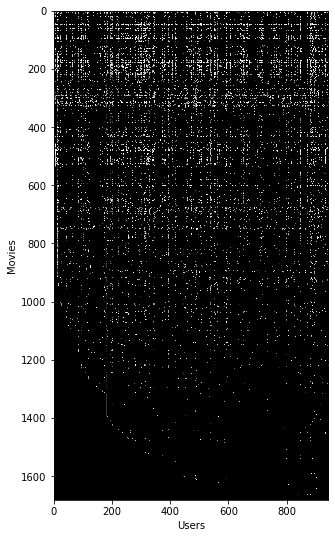

In [2]:
print('Loading movie ratings dataset.\n\n')
data = scio.loadmat('ex8_movies.mat')
Y,R=data['Y'],data['R']
print('Average rating for movie 1 (Toy Story): {} / 5\n\n'.format(np.mean(Y[0, np.argwhere(R[0, :]==1)])))
plt.imshow(Y)
plt.ylabel('Movies')
plt.xlabel('Users')

## Part 2: Collaborative Filtering Cost Function
You will now implement the cost function for collaborative filtering.
To help you debug your cost function, we have included set of weights
that we trained on that. Specifically, you should complete the code in
cofiCostFunc.m to return J.

In [3]:
data = scio.loadmat('ex8_movieParams.mat')
X,Theta,num_users,num_movies,num_features =data['X'],data['Theta'],data['num_users'],data['num_movies'],data['num_features']
num_users = 4
num_movies = 5
num_features = 3
X = X[0:num_movies, 0:num_features]
Theta = Theta[0:num_users, 0:num_features]
Y = Y[0:num_movies, 0:num_users]
R = R[0:num_movies, 0:num_users]
J,_= cofiCostFunc(np.append(X,Theta), Y, R, num_users, num_movies,num_features, 0)
print('Cost at loaded parameters: %f \n(this value should be about 22.22)\n' % J)

Cost at loaded parameters: 22.224604 
(this value should be about 22.22)



## Part 3: Collaborative Filtering Gradient
Once your cost function matches up with ours, you should now implement
the collaborative filtering gradient function. Specifically, you should
complete the code in cofiCostFunc.m to return the grad argument.

In [4]:
print('\nChecking Gradients (without regularization) ... \n')
checkCostFunction()



Checking Gradients (without regularization) ... 

The above two columns you get should be very similar.
 (Left-Your Numerical Gradient, Right-Analytical Gradient)


If your backpropagation implementation is correct, then 
the relative difference will be small (less than 1e-9). 

Relative Difference: 9.520694516009954e-13 



## Part 4: Collaborative Filtering Cost Regularization
Now, you should implement regularization for the cost function for
collaborative filtering. You can implement it by adding the cost of
regularization to the original cost computation.

In [5]:
J,_= cofiCostFunc(np.append(X,Theta), Y, R, num_users, num_movies,num_features, 1.5)
print('Cost at loaded parameters (lambda = 1.5): %f \n(this value should be about 31.34)\n' % J)


Cost at loaded parameters (lambda = 1.5): 31.344056 
(this value should be about 31.34)



## Part 5: Collaborative Filtering Gradient Regularization
Once your cost matches up with ours, you should proceed to implement
regularization for the gradient.

In [6]:
print('\nChecking Gradients (with regularization) ... \n')
checkCostFunction(1.5)



Checking Gradients (with regularization) ... 

The above two columns you get should be very similar.
 (Left-Your Numerical Gradient, Right-Analytical Gradient)


If your backpropagation implementation is correct, then 
the relative difference will be small (less than 1e-9). 

Relative Difference: 3.486162895485841e-12 



##  Part 6: Entering ratings for a new user
Before we will train the collaborative filtering model, we will first
add ratings that correspond to a new user that we just observed. This
part of the code will also allow you to put in your own ratings for the
movies in our dataset!

In [7]:
movieList = loadMovieList()
print(movieList[20])
my_ratings=np.zeros((1682,1))
my_ratings[0] = 4

# Or suppose did not enjoy Silence of the Lambs (1991), you can set
my_ratings[97] = 2

# We have selected a few movies we liked / did not like and the ratings we
# gave are as follows:
my_ratings[6]= 3
my_ratings[11]= 5
my_ratings[53] = 4
my_ratings[63]= 5
my_ratings[65]= 3
my_ratings[68] = 5
my_ratings[182] = 4
my_ratings[225] = 5
my_ratings[354]= 5
print('\n\nNew user ratings:\n')
for i in range(len(my_ratings)):
    if my_ratings[i] > 0:
        print('Rated %d for %s\n'% (my_ratings[i], movieList[i]))

Muppet Treasure Island (1996)


New user ratings:

Rated 4 for Toy Story (1995)

Rated 3 for Twelve Monkeys (1995)

Rated 5 for Usual Suspects, The (1995)

Rated 4 for Outbreak (1995)

Rated 5 for Shawshank Redemption, The (1994)

Rated 3 for While You Were Sleeping (1995)

Rated 5 for Forrest Gump (1994)

Rated 2 for Silence of the Lambs, The (1991)

Rated 4 for Alien (1979)

Rated 5 for Die Hard 2 (1990)

Rated 5 for Sphere (1998)



##  Part 7: Learning Movie Ratings
Now, you will train the collaborative filtering model on a movie rating
dataset of 1682 movies and 943 users

In [8]:
print('\nTraining collaborative filtering...\n')
data = scio.loadmat('ex8_movies.mat')
Y,R=data['Y'],data['R']
Y =np.hstack((my_ratings,Y))
R = np.hstack(((my_ratings != 0).astype(int),R))
Ynorm, Ymean = normalizeRatings(Y, R)
# Useful Values
num_users = Y.shape[1]
num_movies = Y.shape[0]
num_features = 10

# Set Initial Parameters (Theta, X)
X = np.random.randn(num_movies, num_features)
Theta = np.random.randn(num_users, num_features)

initial_parameters = np.append(X,Theta)
lamb = 10
result=opt.minimize(fun=cofiCostFunc,x0=initial_parameters,
                    args=(Ynorm, R, num_users, num_movies, num_features, lamb),
                    method='CG', jac=True,options={'maxiter':100})
theta=result.x
print(result.fun)
X = np.reshape(theta[0:num_movies*num_features], (num_movies, num_features))
Theta = np.reshape(theta[num_movies*num_features:],(num_users, num_features))

print('Recommender system learning completed.\n');


Training collaborative filtering...

38968.553119322074
Recommender system learning completed.



## Part 8: Recommendation for you
After training the model, you can now make recommendations by computing
the predictions matrix.

In [9]:
p = X .dot(Theta.T)
my_predictions = p[:,0] + Ymean[:,0]

movieList = loadMovieList()

ix = np.argsort(-my_predictions)
print('\nTop recommendations for you:\n')
for i in range(10):
    j = ix[i]
    print('Predicting rating %.1f for movie %s\n'% (my_predictions[j],movieList[j]))

print('\n\nOriginal ratings provided:\n')
for i in range(len(my_ratings)):
    if my_ratings[i] > 0:
        print('Rated %d for %s\n'% (my_ratings[i], movieList[i]))


Top recommendations for you:

Predicting rating 5.0 for movie Entertaining Angels: The Dorothy Day Story (1996)

Predicting rating 5.0 for movie Santa with Muscles (1996)

Predicting rating 5.0 for movie Prefontaine (1997)

Predicting rating 5.0 for movie They Made Me a Criminal (1939)

Predicting rating 5.0 for movie Someone Else's America (1995)

Predicting rating 5.0 for movie Great Day in Harlem, A (1994)

Predicting rating 5.0 for movie Marlene Dietrich: Shadow and Light (1996) 

Predicting rating 5.0 for movie Star Kid (1997)

Predicting rating 5.0 for movie Saint of Fort Washington, The (1993)

Predicting rating 5.0 for movie Aiqing wansui (1994)



Original ratings provided:

Rated 4 for Toy Story (1995)

Rated 3 for Twelve Monkeys (1995)

Rated 5 for Usual Suspects, The (1995)

Rated 4 for Outbreak (1995)

Rated 5 for Shawshank Redemption, The (1994)

Rated 3 for While You Were Sleeping (1995)

Rated 5 for Forrest Gump (1994)

Rated 2 for Silence of the Lambs, The (1991)

Rat